# 이 파일은 affine transform이 무엇인지를 이해하기 위해 단순히 Topo Image에 그대로 affine transform을 적용해본 것입니다. 실제 연구에서 사용하는 affine transform은 affine_transform_prac.ipynb 파일에 있습니다.

In [29]:
from package_nanonis.nanonis_sxm import * 
import numpy as np 
import matplotlib.pyplot as plt
from package_utils.cmap_custom import nanox
from skimage.io import imread # read/load the input image
from scipy import ndimage # affine transformation

array([512, 512], dtype=int64)

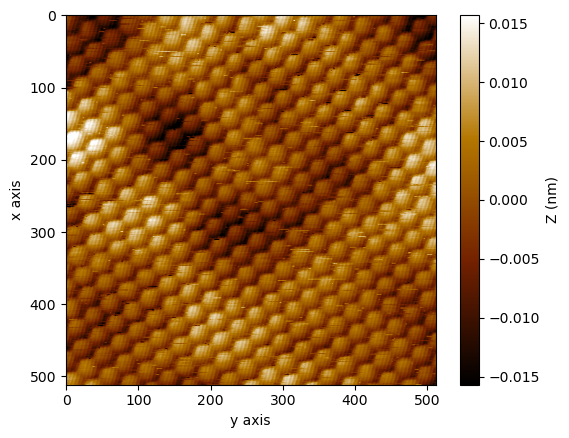

In [188]:
a = topography('Topo/Au111_W_LN2_0689.sxm')
z = a.get_z('subtract linear fit xy')*1e9
sigma = 3
plt.imshow(z, vmin = np.mean(z) - sigma*np.std(z), vmax = np.mean(z) + sigma*np.std(z), cmap = nanox())
cbar = plt.colorbar(location='right') #colormap 추가
cbar.set_label('Z (nm)')
plt.xlabel('y axis')
plt.ylabel('x axis')
a.header['scan_pixels']

In [183]:
# define function to show images
def show(image, transformedimage):

    fig, ax = plt.subplots(nrows=1, ncols=2, dpi=100)
    ax[0].set_title('Original image')
    ax[0].imshow(image, vmin = np.mean(z) - 3*np.std(z), vmax = np.mean(z) + 3*np.std(z), cmap = nanox())
    ax[0].set_xlabel('y axis')
    ax[0].set_ylabel('x axis')

    ax[1].set_title('Transformed image')
    ax[1].imshow(transformedimage, vmin = np.mean(z) - 3*np.std(z), vmax = np.mean(z) + 3*np.std(z), cmap = nanox())
    ax[1].set_xlabel('y axis')
    ax[1].set_ylabel('x axis')

    fig.tight_layout()
    plt.show()

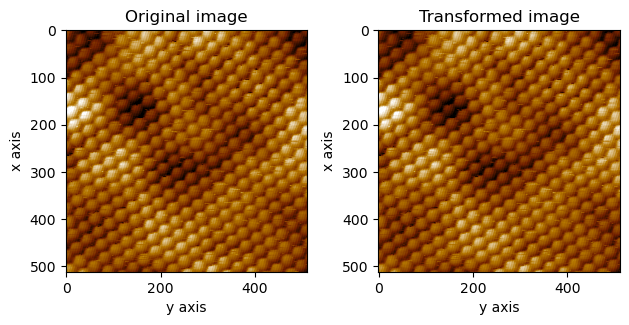

In [117]:
# Identity transformation
# Matrix: I(3x3)
matIdentity = np.array([[1,0,0],[0,1,0],[0,0,1]])
imIdentity = ndimage.affine_transform(z, matIdentity)
show(z,imIdentity)

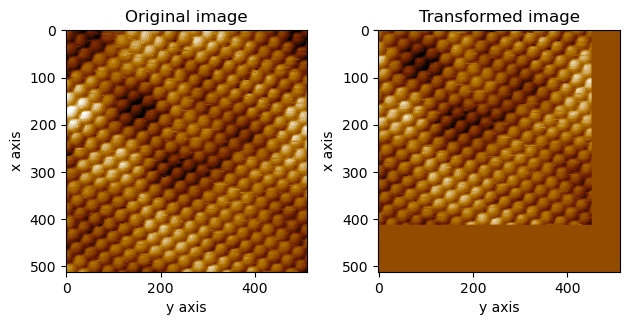

In [151]:
# Translation
# Matrix: ([[1,0,t_x],[0,1,t_y],[0,0,1]]) t_x, t_y: displacement along x,y axis, respectively.
matTranslation = np.array([[1,0,100],[0,1,60],[0,0,1]])
imTranslation = ndimage.affine_transform(z, matTranslation)
show(z,imTranslation)

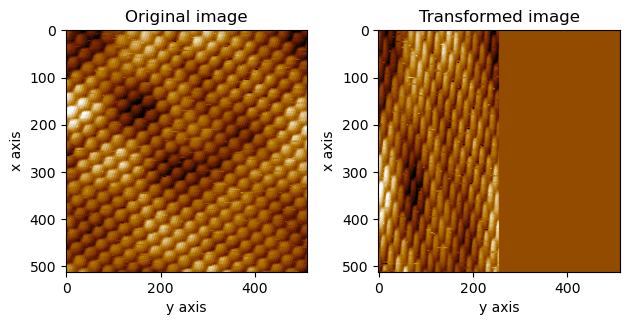

In [121]:
# Scale
# Matrix: ([W,0,0],[0,H,0],[0,0,1]) W: scale in x-axis, H: scale in y-axis
# if W or H < 1: zoom in the image, if W or H > 1: zoom out the image
matScale = np.array([[0.5,0,0],[0,2,0],[0,0,1]])
imScale = ndimage.affine_transform(z, matScale)
show(z,imScale)

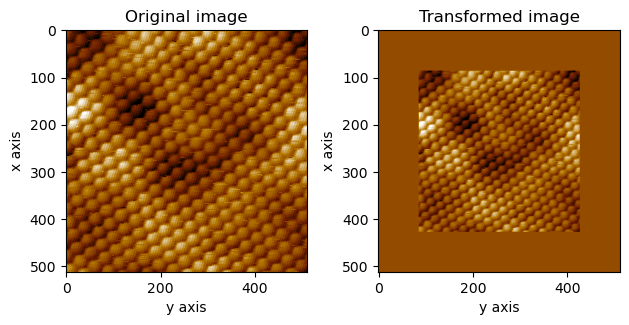

In [115]:
# Scale in the middle of the image

# get image width and height
width, height = z.shape
# translate the image: move the origin to center
matTranslationCenter = np.array([[1,0,width/2],[0,1,height/2],[0,0,1]])
# scale the image
matScale = np.array([[1.5,0,0],[0,1.5,0],[0,0,1]])
# translate the image: move the origin back to top left corner
matTransitionTopLeft = np.array([[1,0,-width/2],[0,1,-height/2],[0,0,1]])
# combine the matrix by matrix multiplication
matScaleMid = matTranslationCenter @ matScale @ matTransitionTopLeft

imScaleMid = ndimage.affine_transform(z, matScaleMid)
show(z,imScaleMid)

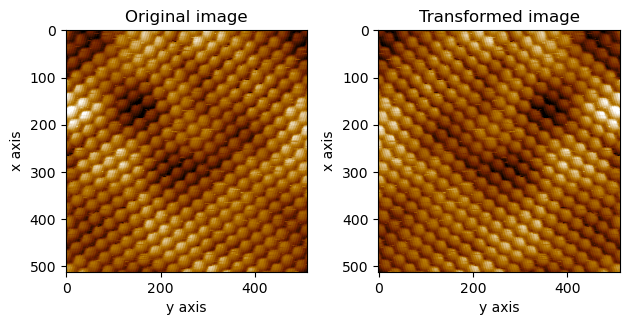

In [159]:
# Reflection
# Reflection about x-axis
# Matrix: ([[1,0,0],[0,-1,Width],[0,0,1]]) , Translation matrix should be combine.
matReflectionX = np.array([[1,0,0],[0,-1,width],[0,0,1]])
imReflectionX = ndimage.affine_transform(z,matReflectionX)
show(z,imReflectionX)

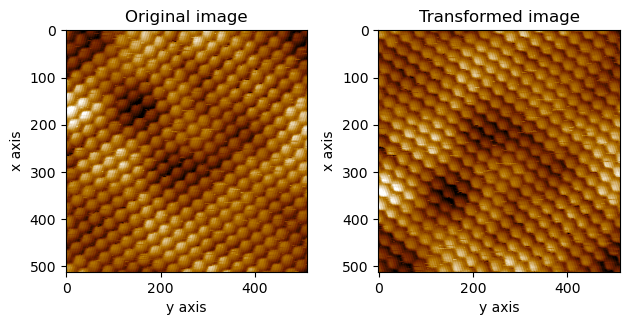

In [161]:
# Reflection about y-axis
# Matrix: ([[-1,0,Height],[0,1,0],[0,0,1]]) , Translation matrix should be combine.
matReflectionY = np.array([[-1,0,height],[0,1,0],[0,0,1]])
imReflectionY = ndimage.affine_transform(z,matReflectionY)
show(z,imReflectionY)

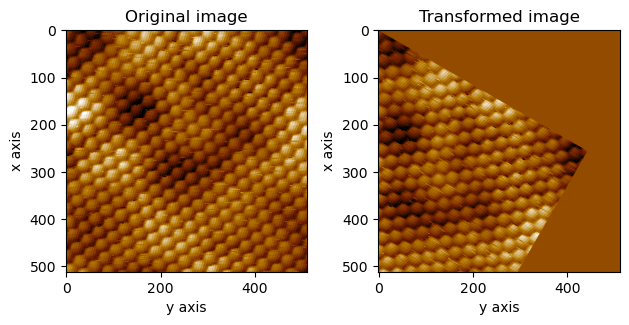

In [169]:
# Rotation
# Matrix: ([[cosθ,-sinθ,0],[sinθ,cosθ,0],[0,0,1]])

# Rotation angle
theta = np.pi/6
# clockwise rotation about origin
matRotation = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
imRotation = ndimage.affine_transform(z,matRotation)
show(z,imRotation)

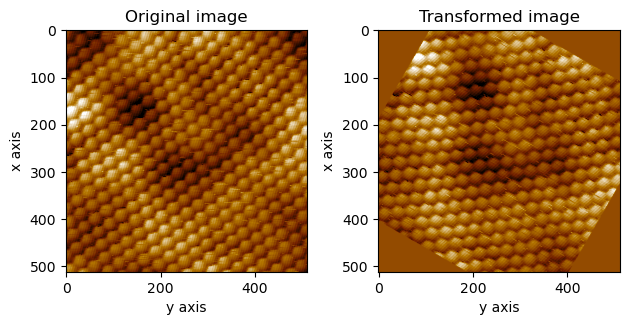

In [171]:
# Rotation about origin in the center

# translate the image: move the origin to center
matTranslationCenter = np.array([[1,0,width/2],[0,1,height/2],[0,0,1]])
# rotation the image (clockwise)
matRotation = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
# translate the image: move the origin back to top left corner
matTransitionTopLeft = np.array([[1,0,-width/2],[0,1,-height/2],[0,0,1]])
# combine the matrix by matrix multiplication
matRotationMid = matTranslationCenter @ matRotation @ matTransitionTopLeft

imRotationMid = ndimage.affine_transform(z,matRotationMid)
show(z,imRotationMid)

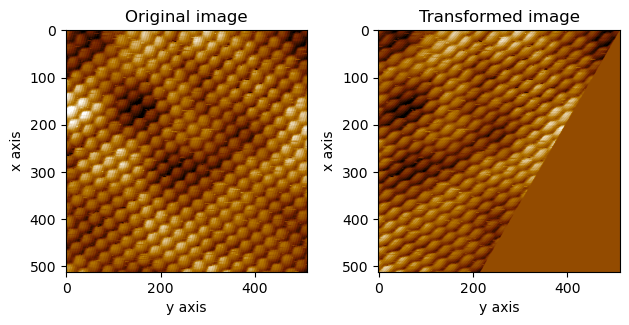

In [179]:
# Shear
# Shear in y-axis
# Matrix: ([1,0,0],[tanθ,1,0],[0,0,1])
matShearY = np.array([[1,0,0],[np.tan(theta),1,0],[0,0,1]])
imShearY = ndimage.affine_transform(z,matShearY)
show(z,imShearY)

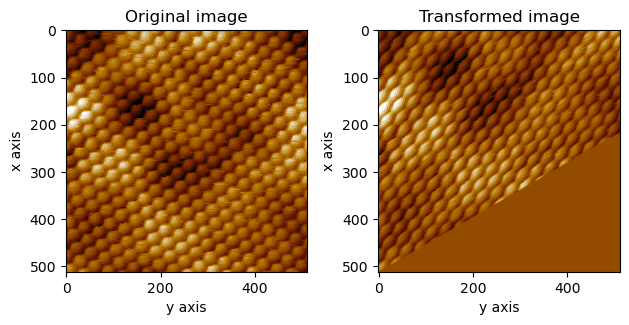

In [181]:
# Shear in x-axis
# Matrix: ([1,tanθ,0],[0,1,0],[0,0,1])
matShearX = np.array([[1,np.tan(theta),0],[0,1,0],[0,0,1]])
imShearX = ndimage.affine_transform(z,matShearX)
show(z,imShearX)